Josh Hoge

jsh10043@nyu.edu

NYU Tandon Data Science Bootcamp Week 7 Exercises

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Example round/run:
Observed 1 sixes out of 10 rolls

P(A | 1 sixes) = 0.760
P(B | 1 sixes) = 0.237
P(C | 1 sixes) = 0.003

True die: A

Intuitions for this experiment:
  0 sixes: Die A most likely (low p)
  3 sixes: Ambiguous between A, B, C
  6+ sixes: Die C most likely (high p)
  10 sixes: Die C almost certain



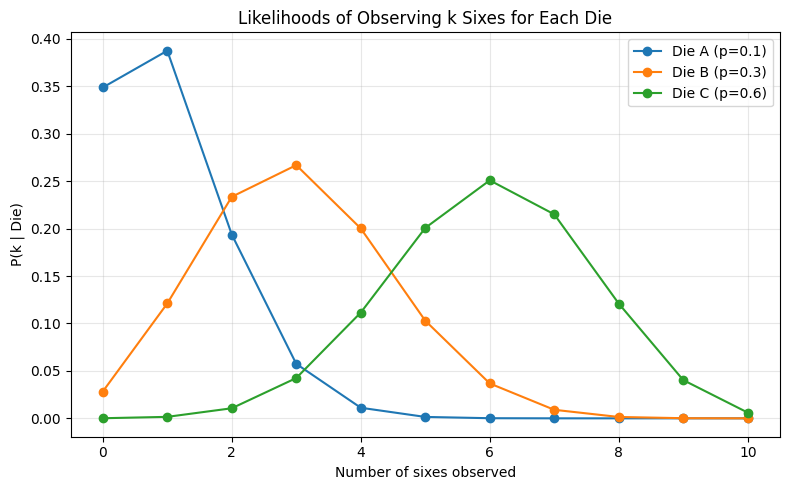


Accuracy Evaluation
Accuracy over 100 rounds: 75.00%

Confusion Matrix:
True\Pred        A       B       C
A               23      10       0
B                2      26       5
C                0       8      26



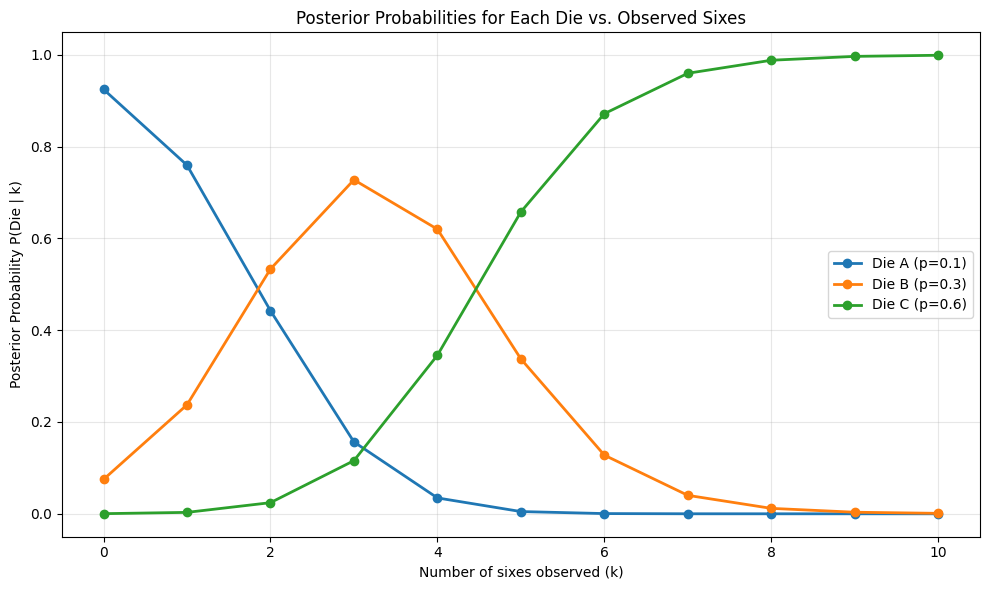

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = 1/3  # each die is equally likely
n_rolls = 10

# compute binomial probability mass function
def binomial_prob(n, k, p):
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

def simulate_round():
    # pick a random die with equal probability
    true_die = np.random.choice(dice_names)
    p_six = dice_probs[true_die]
    # simulate n_rolls with probability p_six of getting a six
    rolls = np.random.rand(n_rolls)
    k = np.sum(rolls < p_six)  # Count number of sixes
    return true_die, k

def posterior_given_k(k):
    # compute likelihoods P(k | Die) for each die
    likelihoods = np.array([binomial_prob(n_rolls, k, dice_probs[die]) for die in dice_names])
    # prior probabilities P(Die)
    priors = np.array([prior] * 3)
    # numerator: P(k | Die) * P(Die)
    numerators = likelihoods * priors
    # denominator: sum over all dice
    denominator = np.sum(numerators)
    # posterior: P(Die | k) = P(k | Die) * P(Die) / P(k)
    posteriors = numerators / denominator
    return posteriors

# example run
print("Example round/run:")
true_die, k = simulate_round()
posterior = posterior_given_k(k)
print(f"Observed {k} sixes out of {n_rolls} rolls")
print()
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"\nTrue die: {true_die}")
print()

# print experiemtn intuitions
print("Intuitions for this experiment:")
print("  0 sixes: Die A most likely (low p)")
print("  3 sixes: Ambiguous between A, B, C")
print("  6+ sixes: Die C most likely (high p)")
print("  10 sixes: Die C almost certain")
print()

# likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], marker='o', label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print()

# accuracy evaluation
print("Accuracy Evaluation")
num_trials = 100
correct = 0
confusion_matrix = {die: {pred: 0 for pred in dice_names} for die in dice_names}

for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    confusion_matrix[true_die][predicted_die] += 1
    correct += (predicted_die == true_die)

accuracy = correct / num_trials
print(f"Accuracy over {num_trials} rounds: {accuracy:.2%}")
print()
print("Confusion Matrix:")
print(f"{'True\\Pred':<10}", end="")
for pred in dice_names:
    print(f"{pred:>8}", end="")
print()
for true_die in dice_names:
    print(f"{true_die:<10}", end="")
    for pred in dice_names:
        print(f"{confusion_matrix[true_die][pred]:>8}", end="")
    print()
print()

# compute posterior probabilities for all possible values of k
posterior_matrix = np.zeros((len(ks), len(dice_names)))
for i, k in enumerate(ks):
    posterior_matrix[i, :] = posterior_given_k(k)


# visualization for posterior probabilities as line plots
plt.figure(figsize=(10,6))
for i, die in enumerate(dice_names):
    plt.plot(ks, posterior_matrix[:, i], marker='o', label=f'Die {die} (p={dice_probs[die]})', linewidth=2)
plt.xlabel('Number of sixes observed (k)')
plt.ylabel('Posterior Probability P(Die | k)')
plt.legend()
plt.title('Posterior Probabilities for Each Die vs. Observed Sixes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

(JSH: the points appear to be parabolic, so maybe a polynomial regression would be better!)

In [6]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]

# normal equation: theta = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# predictions using the fitted model
y_pred = X @ theta

# mse function
mse_linear = np.mean((y - y_pred) ** 2)

print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [ 5.00000000e+00 -5.55111512e-17] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

Gradient Descent: Minimize f(w) = 5(w-11)^4


Learning Rate α = 1/400:
Step     w                    f(w)                

0        13.0000000000        80.0000000000       
1        12.6000000000        32.7680000000       
2        12.3952000000        18.9459276581       
3        12.2594063671        12.5786357999       
4        12.1595288683        9.0384980051        
5        12.0815791229        6.8423169430        

Learning Rate α = 1/4000000:
Step     w                    f(w)                

0        13.0000000000        80.0000000000       
1        12.9999600000        79.9936001920       
2        12.9999200024        79.9872011519       
3        12.9998800072        79.9808028797       
4        12.9998400144        79.9744053751       
5        12.9998000240        79.9680086381       



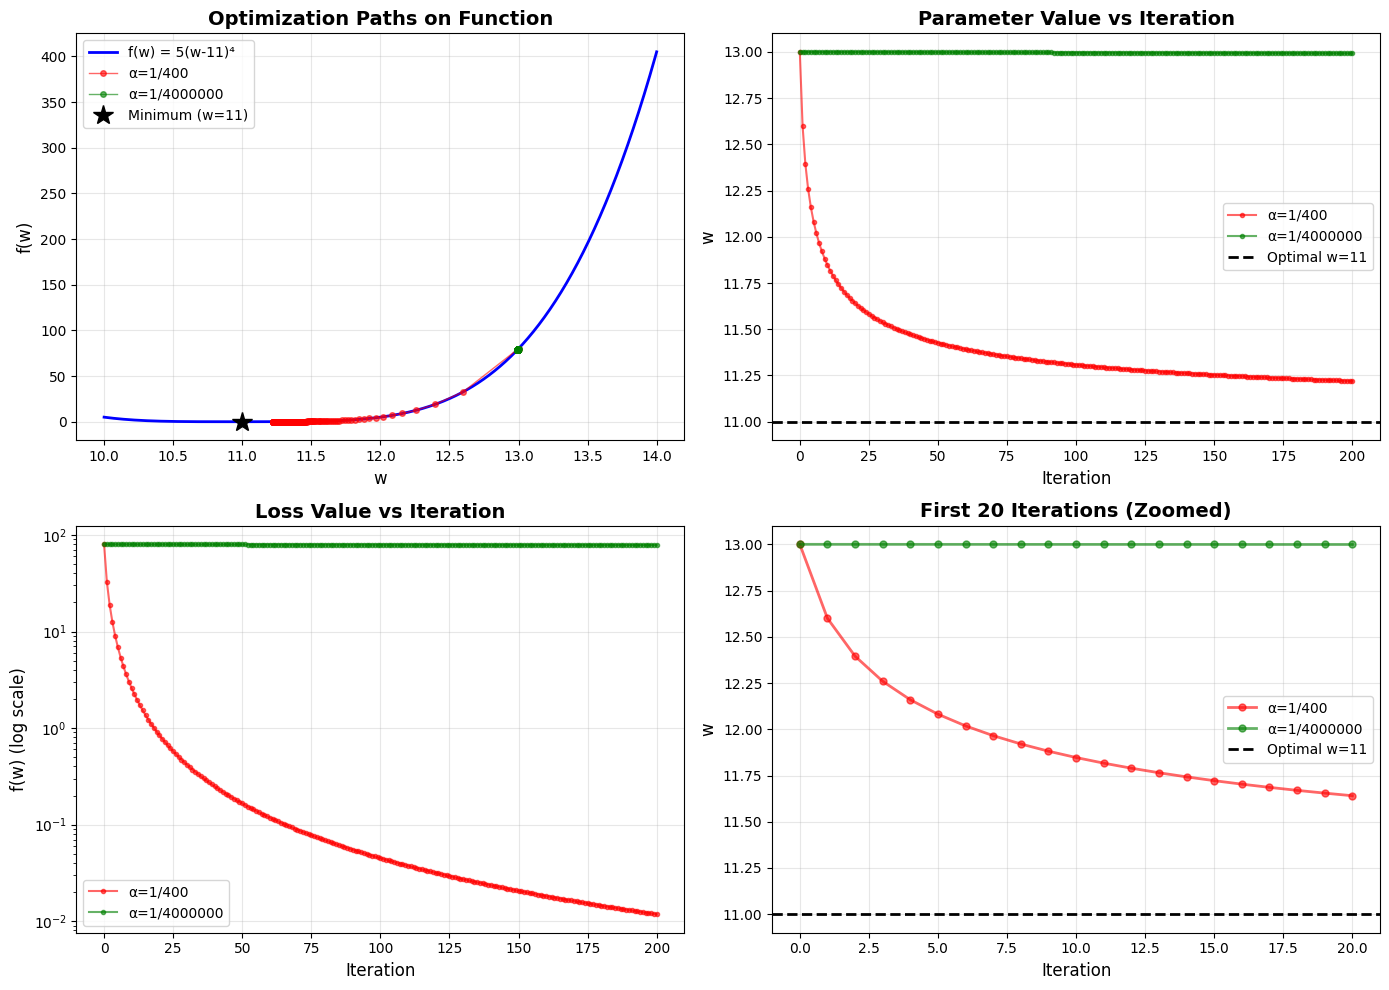


Summary Statistics:

α = 1/400:
  Final w: 11.2203410855
  Final f(w): 1.1785606675e-02
  Distance from optimal: 2.2034108553e-01

α = 1/4000000:
  Final w: 12.9920474460
  Final f(w): 7.8735160437e+01
  Distance from optimal: 1.9920474460e+00


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# define the function and its derivative
def f(w):
    return 5 * (w - 11)**4

def df(w):
    # derivative: f'(w) = 20(w-11)^3
    return 20 * (w - 11)**3

# gradient descent function
def grad_descent_vals(w0, alpha, steps):
    history = [w0]
    w = w0

    for i in range(steps):
        # update rule: w = w - alpha * gradient
        w = w - alpha * df(w)
        history.append(w)

    return np.array(history)

# run for two learning rates
print("Gradient Descent: Minimize f(w) = 5(w-11)^4")
print()

# learning rate α = 1/400
print("\nLearning Rate α = 1/400:")

hist_140 = grad_descent_vals(13, 1/400, 200)
print(f"{'Step':<8} {'w':<20} {'f(w)':<20}")
print()
for i in range(6):  # print first 5 steps (0-5)
    print(f"{i:<8} {hist_140[i]:<20.10f} {f(hist_140[i]):<20.10f}")

# learning rate α = 1/4000000
print("\nLearning Rate α = 1/4000000:")
hist_180 = grad_descent_vals(13, 1/4000000, 200)
print(f"{'Step':<8} {'w':<20} {'f(w)':<20}")
print()
for i in range(6):  # print first 5 steps (0-5)
    print(f"{i:<8} {hist_180[i]:<20.10f} {f(hist_180[i]):<20.10f}")

print()

# visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# plot function with optimization paths
w_range = np.linspace(10, 14, 400)
f_range = f(w_range)

axes[0, 0].plot(w_range, f_range, 'b-', linewidth=2, label='f(w) = 5(w-11)⁴')
axes[0, 0].plot(hist_140, f(hist_140), 'ro-', alpha=0.6, markersize=4,
                linewidth=1, label=f'α=1/400')
axes[0, 0].plot(hist_180, f(hist_180), 'go-', alpha=0.6, markersize=4,
                linewidth=1, label=f'α=1/4000000')
axes[0, 0].plot(11, 0, 'k*', markersize=15, label='Minimum (w=11)')
axes[0, 0].set_xlabel('w', fontsize=12)
axes[0, 0].set_ylabel('f(w)', fontsize=12)
axes[0, 0].set_title('Optimization Paths on Function', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# plot convergence over iterations with values
axes[0, 1].plot(hist_140, 'ro-', alpha=0.6, markersize=3, linewidth=1.5,
                label=f'α=1/400')
axes[0, 1].plot(hist_180, 'go-', alpha=0.6, markersize=3, linewidth=1.5,
                label=f'α=1/4000000')
axes[0, 1].axhline(y=11, color='k', linestyle='--', linewidth=2, label='Optimal w=11')
axes[0, 1].set_xlabel('Iteration', fontsize=12)
axes[0, 1].set_ylabel('w', fontsize=12)
axes[0, 1].set_title('Parameter Value vs Iteration', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# plot function values over iterations; logarithmic
axes[1, 0].semilogy(f(hist_140), 'ro-', alpha=0.6, markersize=3, linewidth=1.5,
                    label=f'α=1/400')
axes[1, 0].semilogy(f(hist_180), 'go-', alpha=0.6, markersize=3, linewidth=1.5,
                    label=f'α=1/4000000')
axes[1, 0].set_xlabel('Iteration', fontsize=12)
axes[1, 0].set_ylabel('f(w) (log scale)', fontsize=12)
axes[1, 0].set_title('Loss Value vs Iteration', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# plot first 20 iterations comparison
axes[1, 1].plot(hist_140[:21], 'ro-', alpha=0.6, markersize=5, linewidth=2,
                label=f'α=1/400')
axes[1, 1].plot(hist_180[:21], 'go-', alpha=0.6, markersize=5, linewidth=2,
                label=f'α=1/4000000')
axes[1, 1].axhline(y=11, color='k', linestyle='--', linewidth=2, label='Optimal w=11')
axes[1, 1].set_xlabel('Iteration', fontsize=12)
axes[1, 1].set_ylabel('w', fontsize=12)
axes[1, 1].set_title('First 20 Iterations (Zoomed)', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# summary stats
print("\nSummary Statistics:")
print(f"\nα = 1/400:")
print(f"  Final w: {hist_140[-1]:.10f}")
print(f"  Final f(w): {f(hist_140[-1]):.10e}")
print(f"  Distance from optimal: {abs(hist_140[-1] - 11):.10e}")

print(f"\nα = 1/4000000:")
print(f"  Final w: {hist_180[-1]:.10f}")
print(f"  Final f(w): {f(hist_180[-1]):.10e}")
print(f"  Distance from optimal: {abs(hist_180[-1] - 11):.10e}")